# Happiness

# Question 1 answer

# 1.1.What is your evaluation of the quality of the data?

Answer:
- There are few features/columns with missing values which might affect the relaibility of data
- The Life Ladder feature is representing the happiness score where average score is ~ 5.5

# 1.2.How large is the dataset?

Answer:
- To evaluate the size of the data, I tried to run data.shape command
- From which I could conclude that there are total 2199 rows and 11 columns in this dataset

# 1.3.What are the features (columns) and how are they represented?

Answer:
- There are total 11 features/columns in this dataset listed as below:
- Country name is representing the name of the country
- year is representing the year at which survey is taken
- Life Ladder is representing the happiness score for which values range from 0-9,where higher value indicates       higher happiness score
- Log GDP per capita is representing the logarithm of GDP per capita  
- Social support is representing the social support
- Healthy life expectancy at birth is representing the percentage of healthy life expectancy at birth    
- Freedom to make life choices is representing the probability of freedom to make life choices    
- Generosity is representing the generosity of the respondents
- Perceptions of corruption is representing the perceived level of corruption
- Negative affect is representing the negative affect on the people   
- All the features except Country name are of numeric type, where Country name is of type object

# 1.4.Are there any interesting distributions in the(numeric) features?

Answer:
- To analyze the distributions , I tried running following command and created a histogram
- By looking at the histograms, I could say that all features except year are of normal distrubtion
- Year can be considerd as power law distribution
- Most of the distributions are wide and covering large range of values
- We can spot some outliers in few charts like in healthy life expectancy at birth

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/var/folders/r1/vx6sqznx105fj1p57dq87q900000gp/T/ipykernel_29693/1665395293.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_excel('DataForTable2.1WHR2023.xls')
data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


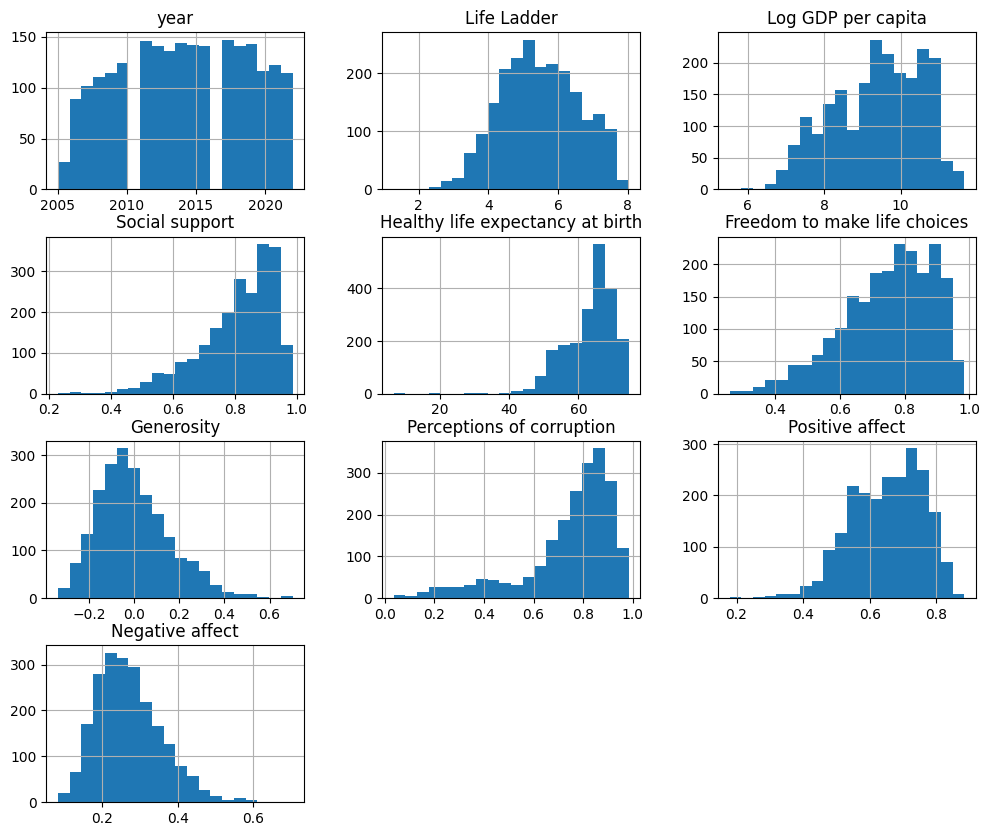

In [3]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_result = numeric_data.describe()
numeric_result
numeric_data.hist(figsize=(12, 10), bins=20)
plt.show()

# 1.5.Are there any interesting correlations in the data?

Answer:
- In order to get the corelation matrix chart, I ran below command
- By looking at the figure,a strong positive correlation between few columns like social support,Life         ladder,Healthy life expectancy at birth is observed where as few columns like Perceptions of corruption,Negative  affect has strong negative correlation

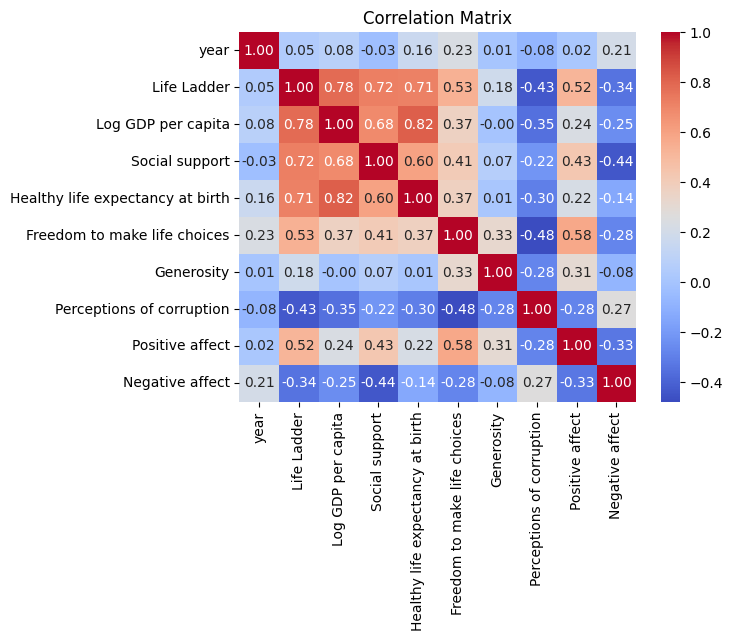

In [4]:
column_to_exclude = 'Country name'
data_excluding_column = data.drop(column_to_exclude, axis=1)
correlation_matrix = data_excluding_column.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 1.6.Can you identify any limitations, missing values or distortions of the data?

Answer:
- To find out the missing values, I tried runnning below command
- We can observe that for every feature we have few number of missing values except Country name, year and Life Ladder for which there arre no missing values

In [5]:
missing_values = data.info()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


# 1.7.What would you like to see in this dataset?

answer:
- May be I would like to see some additional features/columns like work-life balance to know if people are happy managing both their work and personal life,Mental health which would tell more about a person's happiness score

# Question 2 answers

# Imports

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the file

In [7]:
data = pd.read_excel('/Users/ruchamaslekar/Documents/Machine Learning Assignments/DataForTable2.1WHR2023.xls')
data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


# 2.1.Happiest country in year 2023:

- Filtering the dataset to include only data from the year 2023
- Sorting the data based on the 'Life Ladder' column in descending order to find the happiest country
- Extracting the top row, representing the happiest country in 2023
- Retrieving the name of the happiest country in 2022 from the top row
- Printing the variable 'happiest_country_name_2023'

In [8]:
happiest_country_2023 = data[data['year'] == 2022].sort_values(by='Life Ladder', ascending=False).head(1)
happiest_country_name_2023 = happiest_country_2023.iloc[0]['Country name']
print("The happiest country in 2023 is:", happiest_country_name_2023)

The happiest country in 2023 is: Finland


- Extracting entries from the dataset for the year 2023.
- Identifying the five countries with the highest 'Life Ladder' scores in 2023
- Creating a bar chart using Matplotlib.
- Adding labels to the x and y-axes for clarity.
- Including a title indicating the focus on the top countries in 2023
- Rotating x-axis country labels for better presentation.
- Visualizing the bar chart to showcase happiness scores of the top countries in 2023

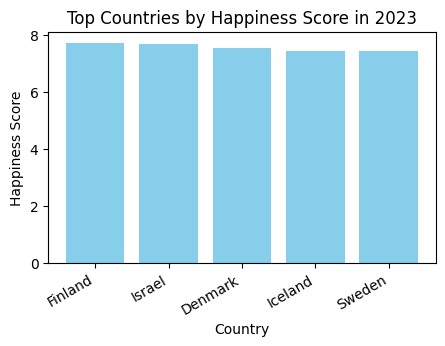

In [9]:
happiest_countries_2023 = data[data['year'] == 2022].nlargest(5, 'Life Ladder')
plt.figure(figsize=(5, 3))
plt.bar(happiest_countries_2023['Country name'], happiest_countries_2023['Life Ladder'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top Countries by Happiness Score in 2023')
plt.xticks(rotation=30, ha='right')
plt.show()

# 2.2.Happiest country in year 2013:

- Filtering the dataset to include only data from the year 2013
- Sorting the data based on the 'Life Ladder' column in descending order to find the happiest country in 2013
- Extracting the top row, representing the happiest country in 2013
- Retrieving the name of the happiest country in 2013 from the top row
- Printing the name of the happiest country in 2013

In [10]:
happiest_country_2013 = data[data['year'] == 2013].sort_values(by='Life Ladder', ascending=False).head(1)
happiest_country_name_2013 = happiest_country_2013.iloc[0]['Country name']
print("The happiest country in 2013 is:", happiest_country_name_2013)

The happiest country in 2013 is: Canada


- Filtering the dataset to include only data from the year 2013
- Selecting the top 5 countries with the highest 'Life Ladder' scores in 2013
- Setting up the figure for the bar chart with a specific size
- Creating a bar chart to visually represent the happiness scores of the selected countries
- Adding labels to the x and y-axes for better understanding
- Including a title indicating the focus on the top countries in 2013
- Rotating x-axis country labels for improved readability
- Displaying the completed bar chart

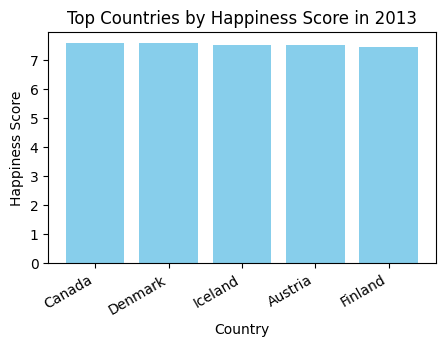

In [11]:
happiest_countries_2013 = data[data['year'] == 2013].nlargest(5, 'Life Ladder')
plt.figure(figsize=(5, 3))
plt.bar(happiest_countries_2013['Country name'], happiest_countries_2013['Life Ladder'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top Countries by Happiness Score in 2013')
plt.xticks(rotation=30, ha='right')
plt.show()

# 2.3.Happiest country of all time:

- Sorting the entire dataset to find the happiest country of all time based on 'Life Ladder'
- Extracting the name of the happiest country from the top row
- Printing the name of the happiest country of all time

In [12]:
happiest_country_all_time = data.sort_values(by='Life Ladder', ascending=False).head(1)
happiest_country_name_all_time = happiest_country_all_time.iloc[0]['Country name']
print("The happiest country of all time is:", happiest_country_name_all_time)

The happiest country of all time is: Denmark


- Sorting the entire dataset to find the happiest countries of all time based on 'Life Ladder'
- Creating a bar chart to visually represent the happiness scores of the top 5 countries
- Adding labels to the x and y-axes for better understanding
- Including a title indicating the focus on the top 5 happiest countries of all time
- Rotating x-axis country labels for improved readability
- Displaying the completed bar chart

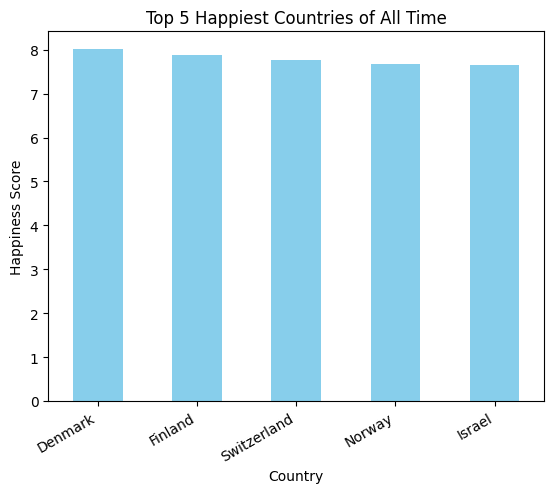

In [13]:
happiest_countries_all_time = data.sort_values(by='Life Ladder', ascending=False).drop_duplicates('Country name').head(5)
happiest_countries_all_time.plot(kind='bar', x='Country name', y='Life Ladder', color='skyblue', legend=False)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Happiest Countries of All Time')
plt.xticks(rotation=30, ha='right')
plt.show()

# 2.4.Least happy country in year 2023:

- Filtering the dataset to include only data from the year 2022
- Extracting the name of the least happy country in 2022 from the top row
- Printing the name of the least happy country in 2022

In [14]:
least_happy_country_2023 = data[data['year'] == 2022].sort_values(by='Life Ladder', ascending=True).head(1)
least_happy_country_name_2023 = least_happy_country_2023.iloc[0]['Country name']
print("The least happy country in 2022 is:", least_happy_country_name_2023)

The least happy country in 2022 is: Afghanistan


- Filtering the dataset to include only data from the year 2022
- Creating a bar chart to visually represent the happiness scores of the top 5 least happy countries in 2022
- Adding labels to the x and y-axes for better understanding
- Including a title indicating the focus on the top 5 least happy countries in 2022
- Rotating x-axis country labels for improved readability
- Displaying the completed bar chart

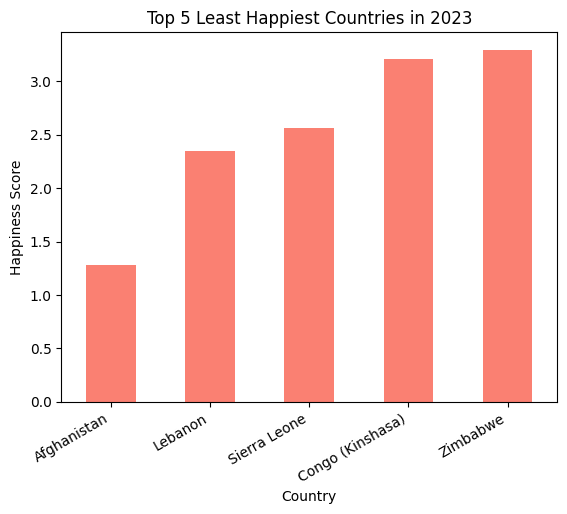

In [15]:
least_happy_countries_2023 = data[data['year'] == 2022].sort_values(by='Life Ladder', ascending=True).drop_duplicates('Country name').head(5)
least_happy_countries_2023.plot(kind='bar', x='Country name', y='Life Ladder', color='salmon', legend=False)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Least Happiest Countries in 2023')
plt.xticks(rotation=30, ha='right')
plt.show()

# 2.5.Least happy country in year 2013:

- Filtering the dataset to include only data from the year 2013
- Extracting the name of the least happy country in 2013 from the top row
- Printing the name of the least happy country in 2013

In [16]:
least_happy_country_2013 = data[data['year'] == 2013].sort_values(by='Life Ladder', ascending=True).head(1)
least_happy_country_name_2013 = least_happy_country_2013.iloc[0]['Country name']
print("The least happy country in 2013 is:", least_happy_country_name_2013)

The least happy country in 2013 is: Syria


- Filtering the dataset to include only data from the year 2013
- Creating a bar chart to visually represent the happiness scores of the top 5 least happy countries in 2013
- Adding labels to the x and y-axes for better understanding
- Including a title indicating the focus on the top 5 least happy countries in 2013
- Rotating x-axis country labels for improved readability
- Displaying the completed bar chart

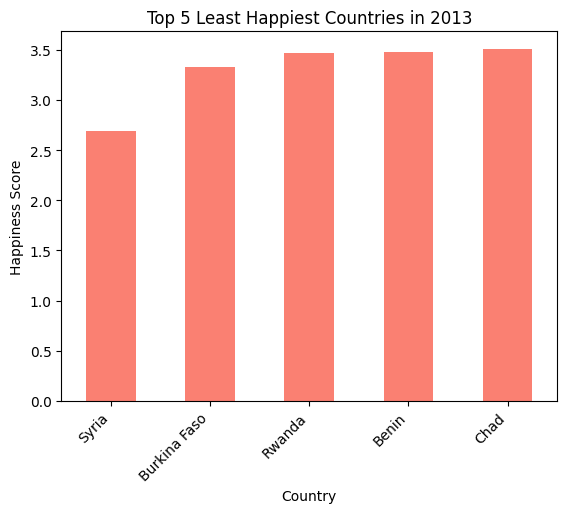

In [17]:
least_happy_countries_2013 = data[data['year'] == 2013].sort_values(by='Life Ladder', ascending=True).drop_duplicates('Country name').head(5)
least_happy_countries_2013.plot(kind='bar', x='Country name', y='Life Ladder', color='salmon', legend=False)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Least Happiest Countries in 2013')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2.6.Least happy country of all years:

- Sorting the entire dataset to find the least happy country of all time based on 'Life Ladder'
- Extracting the name of the least happy country from the top row
- Printing the name of the least happy country of all time

In [18]:
least_happy_country_all_time = data.sort_values(by='Life Ladder', ascending=True).head(1)
least_happy_country_name_all_time = least_happy_country_all_time.iloc[0]['Country name']
print("The least happy country of all time is:", least_happy_country_name_all_time)

The least happy country of all time is: Afghanistan


- Sorting the entire dataset to find the top 5 happiest countries of all time based on 'Life Ladder'
- Creating a bar chart to visually represent the happiness scores of the top 5 least happy countries of all time
- Adding labels to the x and y-axes for better understanding
- Including a title indicating the focus on the top 5 least happy countries of all time
- Rotating x-axis country labels for improved readability
- Displaying the completed bar chart

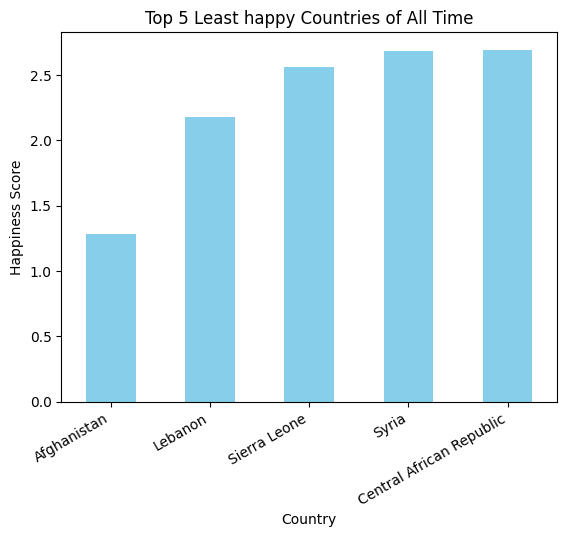

In [19]:
top5_happiest_all_time = data.sort_values(by='Life Ladder', ascending=True).drop_duplicates('Country name').head(5)
top5_happiest_all_time.plot(kind='bar', x='Country name', y='Life Ladder', color='skyblue', legend=False)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Least happy Countries of All Time')
plt.xticks(rotation=30, ha='right')
plt.show()

# Final Answers for question 2

- What is the happiest country in 2022?
  #### Finland
- What is the happiest country in 2013?
  #### Canada
- What is the happiest country of all time?
  #### Denmark
- What is the least happy country in 2022?
  #### Afghanistan
- What is the least happy country in 2013?
  #### Syria
- What is the least happy country of all time?
  #### Afghanistan

# Question 3 answers

# Filtering the data 

In [48]:
sorted_data = data.sort_values(by = ['year'])
data_start = sorted_data.drop_duplicates(subset=['Country name'], keep = 'first')
data_start

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1796,Spain,2005,7.152786,10.543814,0.961043,70.400002,0.916165,NaN,0.777272,0.694323,0.240643
1486,Pakistan,2005,5.224658,8.252209,0.590946,53.200001,0.629996,NaN,0.844436,NaN,0.237266
1261,Mexico,2005,6.580658,9.791636,0.902808,64.400002,0.813745,NaN,0.764249,0.763287,0.218943
2054,United Kingdom,2005,6.983557,10.667256,0.978840,69.099998,0.922355,NaN,0.398457,0.779468,0.261732
638,France,2005,7.093393,10.636769,0.940338,70.699997,0.894819,NaN,0.687851,0.681278,0.225094
...,...,...,...,...,...,...,...,...,...,...,...
195,Bhutan,2013,5.569092,9.097065,0.818949,62.240002,0.810201,0.351611,0.802428,0.663676,0.217350
1752,Somalia,2014,5.528273,6.830418,0.610836,47.660000,0.873879,0.024241,0.456470,0.688916,0.207215
1792,South Sudan,2014,3.831992,NaN,0.545118,52.880001,0.567259,NaN,0.741541,0.578410,0.428320
667,Gambia,2017,4.117939,7.563740,0.697002,56.400002,0.812326,0.114504,0.571616,0.770294,0.277247


In [49]:
data_finish = sorted_data.drop_duplicates(subset=['Country name'],keep = 'last')
data_finish

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
475,Cuba,2006,5.417869,NaN,0.969595,68.000000,0.281458,NaN,NaN,0.596187,0.276602
765,Guyana,2007,5.992826,9.088531,0.848765,56.240002,0.694006,0.084674,0.835569,0.760633,0.296420
1485,Oman,2011,6.852982,10.538620,NaN,62.340000,0.916293,0.009673,NaN,NaN,0.295164
525,Djibouti,2011,4.369194,8.150376,0.632973,55.080002,0.746439,-0.078679,0.518930,0.542736,0.180593
1758,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.686732,0.152428
...,...,...,...,...,...,...,...,...,...,...,...
1013,Kazakhstan,2022,6.006279,10.186872,0.923373,66.199997,0.882938,0.022408,0.720169,0.652438,0.131949
996,Jordan,2022,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,0.520557,0.434517
979,Japan,2022,6.178010,10.636162,0.898650,74.474998,0.788857,-0.235489,0.643010,0.669617,0.164663
1960,Togo,2022,4.238982,7.685194,0.578930,57.700001,0.695722,0.006935,0.713181,0.593970,0.414265


# Calculating change in Life Ladder

In [52]:
merged_data = pd.merge(data_start[['Country name', 'Life Ladder','year']], data_finish[['Country name', 'Life Ladder','year']], on='Country name', suffixes=('_start', '_finish'))
merged_data['change'] = merged_data['Life Ladder_finish'] - merged_data['Life Ladder_start']
merged_data

,Country name,Life Ladder_start,year_start,Life Ladder_finish,year_finish,change
0,Spain,7.152786,2005,6.336902,2022,-0.815884
1,Pakistan,5.224658,2005,4.486835,2021,-0.737823
2,Mexico,6.580658,2005,7.038369,2022,0.457711
3,United Kingdom,6.983557,2005,6.721780,2022,-0.261777
4,France,7.093393,2005,6.613807,2022,-0.479586
...,...,...,...,...,...,...
160,Bhutan,5.569092,2013,5.082129,2015,-0.486963
161,Somalia,5.528273,2014,4.667941,2016,-0.860332
162,South Sudan,3.831992,2014,2.816622,2017,-1.015370
163,Gambia,4.117939,2017,4.279441,2022,0.161502


# 3.1.Country having the largest increase in happiness from start to 2023

In [53]:
max_increase_country = merged_df.nlargest(1, 'change')
print("Country with the maximum increase in happiness in 2023:", max_increase_country)

Country with the maximum increase in happiness in 2023:             Country name  Life Ladder_start  year_start  Life Ladder_finish  \
131  Congo (Brazzaville)           3.819792        2008            5.804919   

     year_finish    change  
131         2022  1.985126  


# 3.2.Country with the largest decrease in happiness from start to 2023

In [54]:
max_decrease_country = merged_df.nsmallest(1,'change')
print("Country with the maximum decrease in happiness in 2023:", max_decrease_country)

Country with the maximum decrease in happiness in 2023:    Country name  Life Ladder_start  year_start  Life Ladder_finish  \
24      Lebanon           5.491245        2005            2.352428   

    year_finish    change  
24         2022 -3.138818  


# Final Answers for question 3

- Of the countries in this dataset, which country had the largest increase in happiness from its start of participation to 2023? 
   #### Congo (Brazzaville) with a score of 1.985126
- Which had the largest decrease in happiness? 
   #### Lebanon with a score of -3.138818